<a href="https://colab.research.google.com/github/Madara123455/Energy-DA-for-Petroleum/blob/main/Material_balance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
## Importing data set of Production and PVT Data for a Gas Cap Drive Reservoir :

column_names = ['p (psi)' , 'Np (MMSTB)', 'Rp (scf/STB)', 'Bo (rb/STB)' , 'Rs (scf/STB)', 'Bg (rb/scf)']

data = {
    'A' : np.array([3330,3150,3000,2850,2700,2550,2400]) , #psi
    'B' : np.array([0, 3.295, 5.903,8.852,11.503,14.513,17.730]), #MMSTB
    'C' : np.array([0,1050,1060,1160,1235,1265,1300]), #scf/stb
    'D' : np.array([1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]), #rb/STB
    'E' : np.array([510,477,450,425,401,375,352]), #scf/stb
    'F' : np.array([0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]) #rb/scf
}

df = pd.DataFrame(data)
df.columns = column_names
df

,p (psi),Np (MMSTB),Rp (scf/STB),Bo (rb/STB),Rs (scf/STB),Bg (rb/scf)
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


### Let's See the variation of all these parameters with Pressure for self analysis : - >

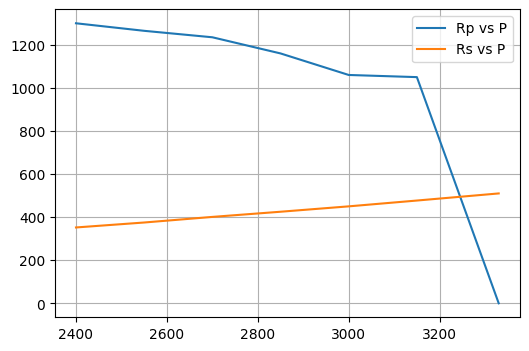

In [47]:
plt.figure(figsize=(6,4))

# plt.plot(P,Np*1000,label='Np vs P')
# plt.plot(P,Bo,label='Bo vs P')
plt.plot(df['p (psi)'],df['Rp (scf/STB)'],label='Rp vs P')
plt.plot(df['p (psi)'],df['Rs (scf/STB)'],label='Rs vs P')
# plt.plot(P,Bg,label='Bg vs P')

plt.legend()
plt.grid()

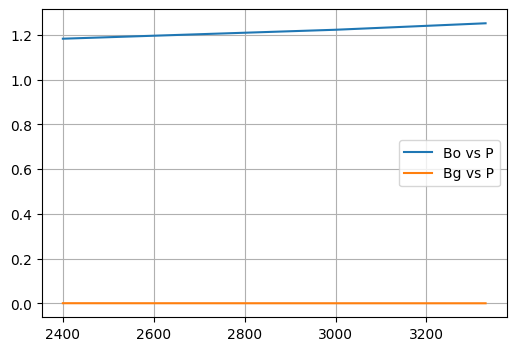

In [48]:
plt.figure(figsize=(6,4))

# plt.plot(P,Np*1000,label='Np vs P')
# plt.plot(P,Bo,label='Bo vs P')
plt.plot(df['p (psi)'],df['Bo (rb/STB)'],label='Bo vs P')
plt.plot(df['p (psi)'],df['Bg (rb/scf)'],label='Bg vs P')
# plt.plot(P,Bg,label='Bg vs P')

plt.legend()
plt.grid()

## Using Havlena and Odeh (1963) form of Material Balance Equation for a Gas cap drive reservoir which is as shown :

> $F = N({E_{o}} + m{E_{g}})$

> $ \frac{F}{Eo} = N + mN (\frac{Eg}{Eo})$

> further $F = N_{p}(Bt + (R_{p} - R_{si})B_{g}) + W_{p}B_{w}$

> and $E_{o} = B_{t} - B_{ti}$

> and $E_{g} = B_{ti}(\frac{B_{g}}{B_{gi}} - 1)$

where ${E_{f,w}}$ ,  ${W_{e}}$  and ${W_{p}}$  are neglected

and calculating $R_{p}$ , which is $\frac{G_{p}}{N_{p}}$

In [29]:
from re import T
df_1 = df.drop(['p (psi)' , 'Np (MMSTB)', 'Rp (scf/STB)', 'Bo (rb/STB)' , 'Rs (scf/STB)', 'Bg (rb/scf)'], axis=1)
df_1['Eo'] = df['Bo (rb/STB)'] - df['Bo (rb/STB)'][0] + (df['Rs (scf/STB)'][0] - df['Rs (scf/STB)'])*df['Bg (rb/scf)'].iloc[1:]
df_1['Eg'] = (df['Bo (rb/STB)'][0]) * ((df['Bg (rb/scf)'] / df['Bg (rb/scf)'][0]) - 1)
df_1['F']  =  (df['Np (MMSTB)'].iloc[1:]) * (df['Bo (rb/STB)'].iloc[1:] + (df['Rp (scf/STB)'].iloc[1:] - df['Rs (scf/STB)'].iloc[1:])*df['Bg (rb/scf)'].iloc[1:])
df_1.fillna(0.0, inplace=True)
df_1.drop(index = 0, inplace = True)
df_1

,Eo,Eg,F
1,0.01456,0.071902,5.807306
2,0.02870,0.129424,10.671443
3,0.04695,0.201326,17.301677
4,0.06773,0.287609,24.093954
5,0.09365,0.373892,31.898123
6,0.12070,0.474555,41.130054


In [32]:
uf = df_1.drop(columns = ['Eo', 'Eg' , 'F'])
uf['F/Eo'] = df_1['F']/df_1['Eo']
uf['Eg/Eo'] = df_1['Eg']/df_1['Eo']
uf

,F/Eo,Eg/Eo
1,398.853413,4.938345
2,371.827296,4.509552
3,368.512814,4.288103
4,355.735328,4.246408
5,340.609959,3.992439
6,340.762668,3.931692


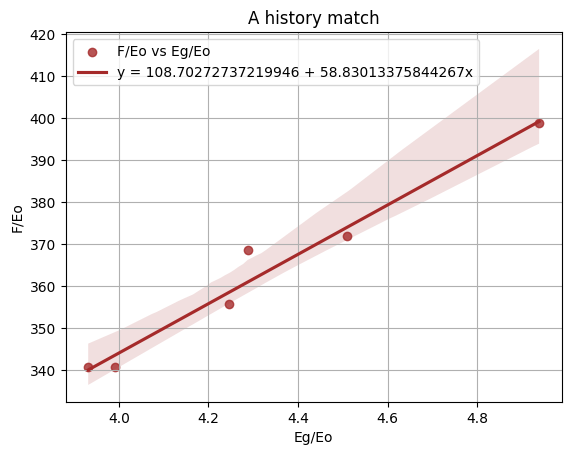

In [54]:
slope , intercept = np.polyfit(uf['Eg/Eo'],uf['F/Eo'] ,1)
sns.regplot(x = 'Eg/Eo', y = 'F/Eo', data = uf , label = 'F/Eo vs Eg/Eo' , line_kws={'label':f'y = {intercept} + {slope}x'} , color = 'brown')
plt.grid()
plt.legend()
plt.title('A history match')
plt.show()

## At last Calculating Initial Gas Cap Volume in place (in MMscf)

> It is given as $\:\:G =\frac{m \:X \:N  \:X \:B_{oi}}{B_{gi}}$

In [53]:
print('So based on Practical Production Data ')
Boi = df['Bo (rb/STB)'][0]
Bgi = df['Bg (rb/scf)'][0]
print(f':-> Initial Oil in place i.e N (in MMSTB) is {intercept}.')
print(f':-> Initial Gas Cap Ratio i.e m  is {slope/intercept}.')
print(f':-> Initial Gas Cap Volume i.e G (in Bscf)  is {(slope*(Boi))/(Bgi*1000)}.')

So based on Practical Production Data 
:-> Initial Oil in place i.e N (in MMSTB) is 108.70272737219946.
:-> Initial Gas Cap Ratio i.e m  is 0.5412020027520338.
:-> Initial Gas Cap Volume i.e G (in Bscf)  is 84.60043717837658.
